In [18]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [7]:
import warnings

# Suppress all warnings globally
warnings.simplefilter("ignore")

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-30,40027.484375,42235.546875,38397.355469,42235.546875,42235.546875,33072782960
1,2021-07-31,42196.304688,42231.449219,41110.832031,41626.195312,41626.195312,25802845343
2,2021-08-01,41460.843750,42541.679688,39540.941406,39974.894531,39974.894531,26688438115
3,2021-08-02,39907.261719,40419.179688,38746.347656,39201.945312,39201.945312,25595265436
4,2021-08-03,39178.402344,39750.031250,37782.050781,38152.980469,38152.980469,26189830450
...,...,...,...,...,...,...,...
725,2023-07-25,29178.970703,29353.160156,29062.433594,29227.390625,29227.390625,10266772793
726,2023-07-26,29225.759766,29675.552734,29113.912109,29354.972656,29354.972656,13497554655
727,2023-07-27,29353.798828,29560.966797,29099.351562,29210.689453,29210.689453,10770779217
728,2023-07-28,29212.164062,29521.513672,29125.845703,29319.246094,29319.246094,11218474952


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,32616.055019,33279.109260,31891.903807,32596.700270,32596.700270,2.793264e+10
std,12917.862573,13238.348312,12542.671086,12906.591007,12906.591007,1.200078e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,6.481776e+09
25%,21527.707031,21803.264648,20957.500488,21529.596191,21529.596191,1.930221e+10
50%,29031.107422,29541.240234,28455.166992,29027.030273,29027.030273,2.719678e+10
75%,42554.383789,43403.862305,41681.547852,42553.135742,42553.135742,3.410989e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,1.189925e+11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       730 non-null    datetime64[ns]
 1   Open       730 non-null    float64       
 2   High       730 non-null    float64       
 3   Low        730 non-null    float64       
 4   Close      730 non-null    float64       
 5   Adj Close  730 non-null    float64       
 6   Volume     730 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 40.0 KB


In [8]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998602,0.997552,0.996115,0.996115,0.209209
High,0.998602,1.000000,0.997504,0.998292,0.998292,0.221784
Low,0.997552,0.997504,1.000000,0.998229,0.998229,0.182202
Close,0.996115,0.998292,0.998229,1.000000,1.000000,0.200572
Adj Close,0.996115,0.998292,0.998229,1.000000,1.000000,0.200572
Volume,0.209209,0.221784,0.182202,0.200572,0.200572,1.000000


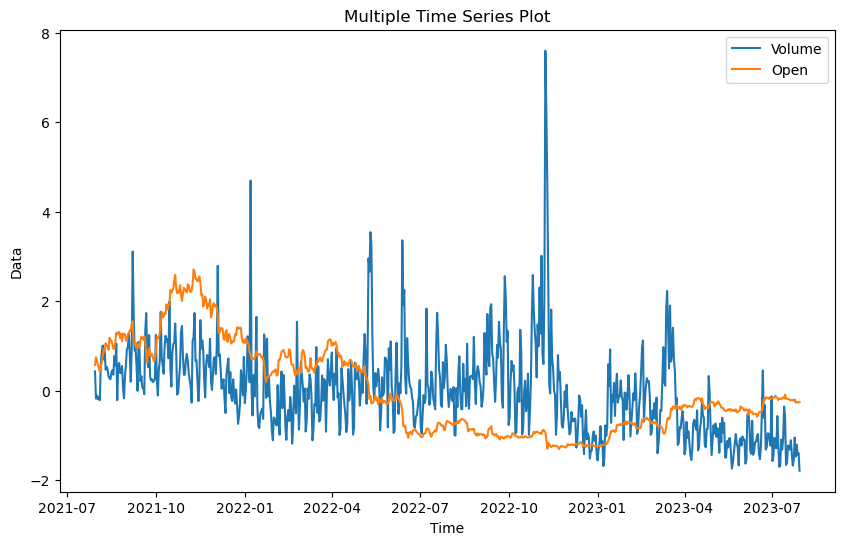

In [15]:
# If you have time values as strings, parse them to datetime objects (skip this step if your time_values are already datetime objects)
time_values = pd.to_datetime(data['Date'])

# Create the time series plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

# Standardize the data
standardized_data_1 = (data['Volume'] - np.mean(data['Volume'])) / np.std(data['Volume'])
standardized_data_2 = (data['Open'] - np.mean(data['Open'])) / np.std(data['Open'])

# Plot the first time series
plt.plot(time_values, standardized_data_1, label='Volume')

# Plot the second time series
plt.plot(time_values, standardized_data_2, label='Open')

# ... Add more time series as needed

# Add labels, title, and legend
plt.xlabel("Time")
plt.ylabel("Data")
plt.title("Multiple Time Series Plot")
plt.legend()

# Show the plot
plt.show()


In [19]:
time_values = pd.to_datetime(data['Date'])

data = data.drop('Date', axis = 1)

for col in data.columns:
    data[col] = (data[col] - np.mean(data[col])) / np.std(data[col])
data

,Open,High,Low,Close,Adj Close,Volume
0,0.574128,0.677016,0.519021,0.747328,0.747328,0.428611
1,0.742137,0.676707,0.735509,0.700083,0.700083,-0.177593
2,0.685164,0.700157,0.610259,0.572053,0.572053,-0.103748
3,0.564815,0.539717,0.546865,0.512124,0.512124,-0.194902
4,0.508354,0.489136,0.469931,0.430795,0.430795,-0.145324
...,...,...,...,...,...,...
725,-0.266255,-0.296762,-0.225742,-0.261232,-0.261232,-1.473069
726,-0.262630,-0.272393,-0.221635,-0.251341,-0.251341,-1.203670
727,-0.252712,-0.281054,-0.222797,-0.262527,-0.262527,-1.431043
728,-0.263683,-0.284036,-0.220683,-0.254111,-0.254111,-1.393712


<Figure size 1000x600 with 0 Axes>

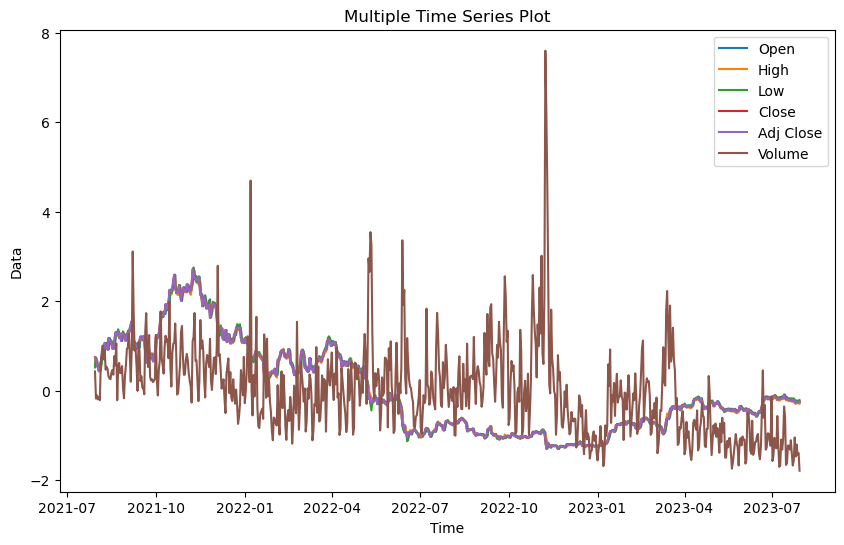

In [21]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

for col in data.columns:
    plt.plot(time_values, data[col], label=col)
    
# Add labels, title, and legend
plt.xlabel("Time")
plt.ylabel("Data")
plt.title("Multiple Time Series Plot")
plt.legend()

# Show the plot
plt.show()

In [28]:
time_values

0     2021-07-30
1     2021-07-31
2     2021-08-01
3     2021-08-02
4     2021-08-03
         ...    
725   2023-07-25
726   2023-07-26
727   2023-07-27
728   2023-07-28
729   2023-07-29
Name: Date, Length: 730, dtype: datetime64[ns]

In [32]:
data = pd.concat([time_values, data], axis = 1)

In [33]:

from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
22/22 [==============================] - 11s 10ms/step - loss: 0.3850
Epoch 2/50
22/22 [==============================] - 0s 11ms/step - loss: 0.3825
Epoch 3/50
22/22 [==============================] - 0s 11ms/step - loss: 0.3831
Epoch 4/50
22/22 [==============================] - 0s 11ms/step - loss: 0.3818
Epoch 5/50
22/22 [==============================] - 0s 10ms/step - loss: 0.3830
Epoch 6/50
22/22 [============================

11:15:33 - cmdstanpy - INFO - Chain [1] start processing
11:15:33 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents 

11:15:39 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 55 with model FBProphet in generation 0 of 10


11:15:39 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 56 with model SeasonalNaive in generation 0 of 10
Model Number: 57 with model DatepartRegression in generation 0 of 10
Model Number: 58 with model NVAR in generation 0 of 10
Model Number: 59 with model Theta in generation 0 of 10
Model Number: 60 with model UnivariateRegression in generation 0 of 10
Model Number: 61 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 61 in generation 0: ARCH
Model Number: 62 with model ConstantNaive in generation 0 of 10
Model Number: 63 with model LastValueNaive in generation 0 of 10
Model Number: 64 with model AverageValueNaive in generation 0 of 10
Model Number: 65 with model GLS in generation 0 of 10
Model Number: 66 with model SeasonalNaive in generation 0 of 10
Model Number: 67 with model GLM in generation 0 of 10
Model Number: 68 with model ETS in generation 0 of 10
Model Number: 69 with model FBProphet in generation 0 of 10


11:15:41 - cmdstanpy - INFO - Chain [1] start processing
11:15:41 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 70 in generation 0: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Model Number: 72 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 72 in generation 0: VAR
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 73 in generation 0: VECM
Model Number: 74 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 74 in generation 0: ARIMA
Model Number: 75 with model WindowRegression in generation 0 of 10
Model Number: 76 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='Use

11:15:48 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 88 with model FBProphet in generation 0 of 10


11:15:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 89 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 89 in generation 0: GluonTS
Model Number: 90 with model MetricMotif in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 90 in generation 0: MetricMotif
Model Number: 91 with model Theta in generation 0 of 10
Model Number: 92 with model NVAR in generation 0 of 10
Model Number: 93 with model WindowRegression in generation 0 of 10
Model Number: 94 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 94 in generation 0: GluonTS
Model Number: 95 with model GLS in generation 0 of 10
Model Number: 96 with model SeasonalNaive in generation 0 of 10
Model Number: 97 with 

C:\Users\Hossein\New folder\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 105 with model UnobservedComponents in generation 0 of 10
Model Number: 106 with model AverageValueNaive in generation 0 of 10
Model Number: 107 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 107 in generation 0: ARCH
Model Number: 108 with model ARIMA in generation 0 of 10
Model Number: 109 with model Theta in generation 0 of 10
Model Number: 110 with model MetricMotif in generation 0 of 10
Model Number: 111 with model SeasonalNaive in generation 0 of 10
Model Number: 112 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 112 in generation 0: VECM
Model Number: 113 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 113 in generation 0: UnobservedComponents
Model Number: 114 with model UnobservedComponents in generation 0 of 10
Model

C:\Users\Hossein\New folder\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 142 with model LastValueNaive in generation 0 of 10
Model Number: 143 with model FBProphet in generation 0 of 10
No anomalies detected.


11:16:33 - cmdstanpy - INFO - Chain [1] start processing
11:16:33 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 144 with model LastValueNaive in generation 0 of 10
Model Number: 145 with model SeasonalNaive in generation 0 of 10
Model Number: 146 with model NVAR in generation 0 of 10
Model Number: 147 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 147 in generation 0: MultivariateRegression
Model Number: 148 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 148 in generation 0: VECM
Model Number: 149 with model NVAR in generation 0 of 10
Model Number: 150 with model AverageValueNaive in generation 0 of 10
Model Number: 151 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 151 in generation 0: ARCH
Model Number: 152 with model ARDL in generation 0 of 10
Model Number: 153 with model MetricMotif in generation 0 of 10
Model Number: 154 with model ConstantNaive in

C:\Users\Hossein\New folder\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 171 with model ARDL in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 171 in generation 0: ARDL
Model Number: 172 with model DatepartRegression in generation 0 of 10
Model Number: 173 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 173 in generation 0: UnobservedComponents
Model Number: 174 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 174 in generation 0: UnobservedComponents
Model Number: 175 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 175 in generation 0: GluonTS
Model Number: 176 with model GLS in generation 0 of 10
Model Number: 177 with mo

11:16:37 - cmdstanpy - INFO - Chain [1] start processing
11:16:37 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 186 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
New Generation: 1 of 10
Model Number: 187 with model UnobservedComponents in generation 1 of 10
Model Number: 188 with model UnobservedComponents in generation 1 of 10
Model Number: 189 with model ARIMA in generation 1 of 10
Model Number: 190 with model LastValueNaive in generation 1 of 10
Model Number: 191 with model NVAR in generation 1 of 10
Model Number: 192 with model MultivariateMotif in generation 1 of 10
Model Number: 193 with model FBProphet in generation 1 of 10


11:16:41 - cmdstanpy - INFO - Chain [1] start processing
11:16:42 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 194 with model Theta in generation 1 of 10
Model Number: 195 with model GLS in generation 1 of 10
Model Number: 196 with model LastValueNaive in generation 1 of 10
Model Number: 197 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 197 in generation 1: GLM
Model Number: 198 with model AverageValueNaive in generation 1 of 10
Model Number: 199 with model LastValueNaive in generation 1 of 10
Model Number: 200 with model ETS in generation 1 of 10
Model Number: 201 with model ETS in generation 1 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 202 with model NVAR in generation 1 of 10
Model Number: 203 with model GLS in generation 1 of 10
Model Number: 204 with model AverageValueNaive in generation 1 of 10
Model Number: 205 with model ConstantNaive in generation 1 of 10
Mod

11:17:06 - cmdstanpy - INFO - Chain [1] start processing
11:17:06 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 221 with model UnivariateRegression in generation 1 of 10
Model Number: 222 with model UnobservedComponents in generation 1 of 10
Model Number: 223 with model GLS in generation 1 of 10
Model Number: 224 with model MultivariateMotif in generation 1 of 10
Model Number: 225 with model MultivariateMotif in generation 1 of 10
Model Number: 226 with model LastValueNaive in generation 1 of 10
Model Number: 227 with model MultivariateMotif in generation 1 of 10
Model Number: 228 with model MetricMotif in generation 1 of 10
Model Number: 229 with model Theta in generation 1 of 10
Model Number: 230 with model ARIMA in generation 1 of 10
Model Number: 231 with model DatepartRegression in generation 1 of 10
Model Number: 232 with model UnobservedComponents in generation 1 of 10
Model Number: 233 with model ETS in generation 1 of 10
Model Number: 234 with model DatepartRegression in generation 1 of 10
Model Number: 235 with model AverageValueNaive in generation 1 of 10
Model Number: 2

11:17:54 - cmdstanpy - INFO - Chain [1] start processing
11:17:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 244 with model GLM in generation 1 of 10
Model Number: 245 with model Theta in generation 1 of 10
Model Number: 246 with model GLS in generation 1 of 10
Model Number: 247 with model FBProphet in generation 1 of 10


11:17:55 - cmdstanpy - INFO - Chain [1] start processing
11:17:55 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 248 with model SeasonalNaive in generation 1 of 10
Model Number: 249 with model NVAR in generation 1 of 10
Model Number: 250 with model AverageValueNaive in generation 1 of 10
Model Number: 251 with model UnobservedComponents in generation 1 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 251 in generation 1: UnobservedComponents
Model Number: 252 with model ConstantNaive in generation 1 of 10
Model Number: 253 with model NVAR in generation 1 of 10
Model Number: 254 with model WindowRegression in generation 1 of 10
Model Number: 255 with model LastValueNaive in generation 1 of 10
Model Number: 256 with model LastValueNaive in generation 1 of 10
Model Number: 257 with model AverageValueNaive in generation 1 of 10
Model Number: 258 with model ETS in generation 1 of 10
Model Number: 259 with model UnobservedComponents in generation 1 of 10
Model Number: 260 with model ConstantNaive in generation 1 of 10
Model Number: 261 with model Theta in generation 1 of

11:17:59 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 263 with model FBProphet in generation 1 of 10


11:17:59 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 264 with model AverageValueNaive in generation 1 of 10
Model Number: 265 with model WindowRegression in generation 1 of 10
Model Number: 266 with model UnobservedComponents in generation 1 of 10
Model Number: 267 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 267 in generation 1: NVAR
Model Number: 268 with model ARIMA in generation 1 of 10
Model Number: 269 with model UnobservedComponents in generation 1 of 10
Model Number: 270 with model ConstantNaive in generation 1 of 10
Model Number: 271 with model AverageValueNaive in generation 1 of 10
Model Number: 272 with model Theta in generation 1 of 10
Model Number: 273 with model WindowRegression in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 273 in generation 1: WindowRegression
Model Number: 274 with model Theta in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration faile

11:18:21 - cmdstanpy - INFO - Chain [1] start processing
11:18:21 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 284 with model ConstantNaive in generation 1 of 10
Model Number: 285 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 285 in generation 1: UnivariateRegression
Model Number: 286 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 286 in generation 1: SectionalMotif
Model Number: 287 with model WindowRegression in generation 1 of 10
Model Number: 288 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 288 in generation 1: MultivariateRegression
Model Number: 289 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 289 in generation 1: ARDL
Model Number: 290 with model UnivariateMotif 

11:18:25 - cmdstanpy - INFO - Chain [1] start processing
11:18:25 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 307 with model SectionalMotif in generation 1 of 10
Model Number: 308 with model Theta in generation 1 of 10
Model Number: 309 with model UnivariateMotif in generation 1 of 10
Model Number: 310 with model AverageValueNaive in generation 1 of 10
Model Number: 311 with model MetricMotif in generation 1 of 10
New Generation: 2 of 10
Model Number: 312 with model ConstantNaive in generation 2 of 10
Model Number: 313 with model LastValueNaive in generation 2 of 10
Model Number: 314 with model ARDL in generation 2 of 10
Model Number: 315 with model AverageValueNaive in generation 2 of 10
Model Number: 316 with model ARIMA in generation 2 of 10
Model Number: 317 with model MultivariateMotif in generation 2 of 10
Model Number: 318 with model NVAR in generation 2 of 10
Model Number: 319 with model UnobservedComponents in generation 2 of 10
Model Number: 320 with model Theta in generation 2 of 10
Model Number: 321 with model MultivariateMotif in generation 2 of 10
Template Eval Erro

11:18:46 - cmdstanpy - INFO - Chain [1] start processing
11:18:47 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 333 with model ConstantNaive in generation 2 of 10
Model Number: 334 with model NVAR in generation 2 of 10
Model Number: 335 with model ETS in generation 2 of 10
Model Number: 336 with model DatepartRegression in generation 2 of 10
Model Number: 337 with model Theta in generation 2 of 10
Model Number: 338 with model ConstantNaive in generation 2 of 10
Model Number: 339 with model UnivariateRegression in generation 2 of 10
Model Number: 340 with model NVAR in generation 2 of 10
Model Number: 341 with model Theta in generation 2 of 10
Model Number: 342 with model UnobservedComponents in generation 2 of 10
Model Number: 343 with model FBProphet in generation 2 of 10


11:18:50 - cmdstanpy - INFO - Chain [1] start processing
11:18:50 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 344 with model MultivariateMotif in generation 2 of 10
Model Number: 345 with model GLM in generation 2 of 10
Model Number: 346 with model ConstantNaive in generation 2 of 10
Model Number: 347 with model GLS in generation 2 of 10
Model Number: 348 with model NVAR in generation 2 of 10
Model Number: 349 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 349 in generation 2: UnobservedComponents
Model Number: 350 with model WindowRegression in generation 2 of 10
Model Number: 351 with model UnobservedComponents in generation 2 of 10
Model Number: 352 with model MetricMotif in generation 2 of 10
Model Number: 353 with model GLS in generation 2 of 10
Model Number: 354 with model AverageValueNaive in generation 2 of 10
Model Number: 355 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 355 i

11:19:40 - cmdstanpy - INFO - Chain [1] start processing
11:19:40 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 386 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 386 in generation 2: FBProphet
Model Number: 387 with model UnivariateRegression in generation 2 of 10
Model Number: 388 with model SectionalMotif in generation 2 of 10
Model Number: 389 with model ARIMA in generation 2 of 10
Model Number: 390 with model ARDL in generation 2 of 10
Model Number: 391 with model UnobservedComponents in generation 2 of 10
Model Number: 392 with model ETS in generation 2 of 10
Model Number: 393 with model GLM in generation 2 of 10
Model Number: 394 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 394 in generation 2: UnobservedComponents
Model Number: 395 with model LastValueNaive in generation 2 of 10
Model Number: 396 with model WindowRegression in generation 2 o

11:19:48 - cmdstanpy - INFO - Chain [1] start processing
11:19:49 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 424 with model SeasonalNaive in generation 2 of 10
Model Number: 425 with model UnivariateMotif in generation 2 of 10
Model Number: 426 with model FBProphet in generation 2 of 10


11:19:49 - cmdstanpy - INFO - Chain [1] start processing
11:19:50 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 427 with model LastValueNaive in generation 2 of 10
Model Number: 428 with model SectionalMotif in generation 2 of 10
Model Number: 429 with model LastValueNaive in generation 2 of 10
Model Number: 430 with model DatepartRegression in generation 2 of 10
Model Number: 431 with model ConstantNaive in generation 2 of 10
Model Number: 432 with model MultivariateMotif in generation 2 of 10
Model Number: 433 with model AverageValueNaive in generation 2 of 10
Model Number: 434 with model Theta in generation 2 of 10
Model Number: 435 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 435 in generation 2: LastValueNaive
Model Number: 436 with model ConstantNaive in generation 2 of 10
New Generation: 3 of 10
Model Number: 437 with model SeasonalNaive in generation 3 of 10
Model Number: 438 with model UnivariateMotif in generation 3 of 10
Model Number: 439 with model AverageValueNaive in generation 3 of 10
Model 

11:19:56 - cmdstanpy - INFO - Chain [1] start processing
11:19:56 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 458 with model UnobservedComponents in generation 3 of 10
Model Number: 459 with model Theta in generation 3 of 10
Model Number: 460 with model ARDL in generation 3 of 10
Model Number: 461 with model MultivariateRegression in generation 3 of 10


11:20:00 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 462 with model FBProphet in generation 3 of 10


11:20:00 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 463 with model DatepartRegression in generation 3 of 10
Model Number: 464 with model MultivariateMotif in generation 3 of 10
Model Number: 465 with model FBProphet in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 465 in generation 3: FBProphet
Model Number: 466 with model FBProphet in generation 3 of 10


11:20:01 - cmdstanpy - INFO - Chain [1] start processing
11:20:02 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 467 with model MetricMotif in generation 3 of 10
Model Number: 468 with model ConstantNaive in generation 3 of 10
Model Number: 469 with model DatepartRegression in generation 3 of 10
Model Number: 470 with model MultivariateMotif in generation 3 of 10
Model Number: 471 with model UnivariateMotif in generation 3 of 10
Model Number: 472 with model ARDL in generation 3 of 10
Model Number: 473 with model FBProphet in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 473 in generation 3: FBProphet
Model Number: 474 with model NVAR in generation 3 of 10
Model Number: 475 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 475 in generation 3: ARDL
Model Number: 476 with model FBProphet in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 476 in generation 3: FBProphet
Model Number: 477 with model NVAR in

11:20:35 - cmdstanpy - INFO - Chain [1] start processing
11:20:36 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 510 with model UnivariateRegression in generation 3 of 10
Model Number: 511 with model Theta in generation 3 of 10
Model Number: 512 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 513 with model ConstantNaive in generation 3 of 10
Model Number: 514 with model UnobservedComponents in generation 3 of 10
Model Number: 515 with model WindowRegression in generation 3 of 10
Model Number: 516 with model Theta in generation 3 of 10
Model Number: 517 with model MetricMotif in generation 3 of 10
Model Number: 518 with model FBProphet in generation 3 of 10


11:20:43 - cmdstanpy - INFO - Chain [1] start processing
11:20:43 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 519 with model DatepartRegression in generation 3 of 10
Model Number: 520 with model NVAR in generation 3 of 10
Model Number: 521 with model UnivariateMotif in generation 3 of 10
Model Number: 522 with model ConstantNaive in generation 3 of 10
Model Number: 523 with model SeasonalNaive in generation 3 of 10
Model Number: 524 with model GLS in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 524 in generation 3: GLS
Model Number: 525 with model Theta in generation 3 of 10
Model Number: 526 with model AverageValueNaive in generation 3 of 10
Model Number: 527 with model UnobservedComponents in generation 3 of 10
Model Number: 528 with model MetricMotif in generation 3 of 10
Model Number: 529 with model NVAR in generation 3 of 10
Model Number: 530 with model SeasonalNaive in generation 3 of 10
Model Number: 531 with model Theta in generation 3 of 10
Model Number: 532 with model AverageValueNaive in generation 3 of 10
Model Number: 5

C:\Users\Hossein\New folder\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 555 with model ConstantNaive in generation 3 of 10
Model Number: 556 with model AverageValueNaive in generation 3 of 10
Model Number: 557 with model NVAR in generation 3 of 10
Model Number: 558 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 558 in generation 3: ConstantNaive
Model Number: 559 with model SeasonalNaive in generation 3 of 10
Model Number: 560 with model NVAR in generation 3 of 10
Model Number: 561 with model NVAR in generation 3 of 10
New Generation: 4 of 10
Model Number: 562 with model ETS in generation 4 of 10
Model Number: 563 with model UnobservedComponents in generation 4 of 10
Model Number: 564 with model ETS in generation 4 of 10
Model Number: 565 with model Theta in generation 4 of 10
Model Number: 566 with model ARIMA in generation 4 of 10
Model Number: 567 with model NVAR in generation 4 of 10
Model Number: 568 with model ConstantNaive in generation 4 of 10
Model Number: 569 

11:21:19 - cmdstanpy - INFO - Chain [1] start processing
11:21:20 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 577 with model Theta in generation 4 of 10
Model Number: 578 with model WindowRegression in generation 4 of 10
Model Number: 579 with model LastValueNaive in generation 4 of 10
Model Number: 580 with model WindowRegression in generation 4 of 10
Model Number: 581 with model WindowRegression in generation 4 of 10
Model Number: 582 with model ConstantNaive in generation 4 of 10
Model Number: 583 with model ConstantNaive in generation 4 of 10
Model Number: 584 with model ARIMA in generation 4 of 10
Model Number: 585 with model WindowRegression in generation 4 of 10
Model Number: 586 with model SeasonalNaive in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 586 in generation 4: SeasonalNaive
Model Number: 587 with model Theta in generation 4 of 10
Model Number: 588 with model AverageValueNaive in generation 4 of 10
Model Number: 589 with model Theta in generation 4 of 10


11:21:24 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 590 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 590 in generation 4: MultivariateMotif
Model Number: 591 with model FBProphet in generation 4 of 10


11:21:24 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 592 with model ETS in generation 4 of 10
Model Number: 593 with model NVAR in generation 4 of 10
Model Number: 594 with model GLM in generation 4 of 10
Model Number: 595 with model UnivariateRegression in generation 4 of 10
Model Number: 596 with model ConstantNaive in generation 4 of 10
Model Number: 597 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 597 in generation 4: LastValueNaive
Model Number: 598 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 598 in generation 4: AverageValueNaive
Model Number: 599 with model UnivariateMotif in generation 4 of 10
Model Number: 600 with model FBProphet in generation 4 of 10


11:21:25 - cmdstanpy - INFO - Chain [1] start processing
11:21:26 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 601 with model FBProphet in generation 4 of 10


11:21:27 - cmdstanpy - INFO - Chain [1] start processing
11:21:27 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 602 with model NVAR in generation 4 of 10
Model Number: 603 with model Theta in generation 4 of 10
Model Number: 604 with model FBProphet in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 604 in generation 4: FBProphet
Model Number: 605 with model NVAR in generation 4 of 10
Model Number: 606 with model MultivariateRegression in generation 4 of 10
Model Number: 607 with model AverageValueNaive in generation 4 of 10
Model Number: 608 with model MetricMotif in generation 4 of 10


11:21:32 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 609 with model FBProphet in generation 4 of 10


11:21:32 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 610 with model Theta in generation 4 of 10
Model Number: 611 with model ETS in generation 4 of 10
Model Number: 612 with model MultivariateMotif in generation 4 of 10
Model Number: 613 with model GLS in generation 4 of 10
Model Number: 614 with model NVAR in generation 4 of 10
Model Number: 615 with model LastValueNaive in generation 4 of 10
Model Number: 616 with model FBProphet in generation 4 of 10


11:21:33 - cmdstanpy - INFO - Chain [1] start processing
11:21:34 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 617 with model WindowRegression in generation 4 of 10
Model Number: 618 with model DatepartRegression in generation 4 of 10
Model Number: 619 with model UnivariateRegression in generation 4 of 10
Model Number: 620 with model Theta in generation 4 of 10
Model Number: 621 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 621 in generation 4: DatepartRegression
Model Number: 622 with model NVAR in generation 4 of 10
Model Number: 623 with model ETS in generation 4 of 10
Model Number: 624 with model UnivariateMotif in generation 4 of 10
Model Number: 625 with model AverageValueNaive in generation 4 of 10
Model Number: 626 with model LastValueNaive in generation 4 of 10
Model Number: 627 with model GLS in generation 4 of 10
Model Number: 628 with model SeasonalNaive in generation 4 of 10
Model Number: 629 with model AverageValueNaive in generation 4 of 10
Model Number: 630 with 

11:21:37 - cmdstanpy - INFO - Chain [1] start processing
11:21:37 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 637 with model LastValueNaive in generation 4 of 10
Model Number: 638 with model Theta in generation 4 of 10
Model Number: 639 with model Theta in generation 4 of 10
Model Number: 640 with model ETS in generation 4 of 10
Model Number: 641 with model NVAR in generation 4 of 10
Model Number: 642 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 642 in generation 4: DatepartRegression
Model Number: 643 with model FBProphet in generation 4 of 10


11:21:38 - cmdstanpy - INFO - Chain [1] start processing
11:21:38 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 644 with model Theta in generation 4 of 10
Model Number: 645 with model AverageValueNaive in generation 4 of 10
Model Number: 646 with model ARIMA in generation 4 of 10
Model Number: 647 with model MetricMotif in generation 4 of 10
Model Number: 648 with model LastValueNaive in generation 4 of 10
Model Number: 649 with model Theta in generation 4 of 10
Model Number: 650 with model AverageValueNaive in generation 4 of 10
Model Number: 651 with model AverageValueNaive in generation 4 of 10
Model Number: 652 with model ETS in generation 4 of 10
Model Number: 653 with model ConstantNaive in generation 4 of 10
Model Number: 654 with model NVAR in generation 4 of 10
Model Number: 655 with model SectionalMotif in generation 4 of 10
Model Number: 656 with model SeasonalNaive in generation 4 of 10
Model Number: 657 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 657 in gen

11:21:48 - cmdstanpy - INFO - Chain [1] start processing
11:21:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 679 with model UnivariateMotif in generation 4 of 10
Model Number: 680 with model MultivariateMotif in generation 4 of 10
Model Number: 681 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 681 in generation 4: UnobservedComponents
Model Number: 682 with model LastValueNaive in generation 4 of 10
Model Number: 683 with model Theta in generation 4 of 10
Model Number: 684 with model NVAR in generation 4 of 10
Model Number: 685 with model ARDL in generation 4 of 10
Model Number: 686 with model FBProphet in generation 4 of 10


11:21:49 - cmdstanpy - INFO - Chain [1] start processing
11:21:50 - cmdstanpy - INFO - Chain [1] done processing


New Generation: 5 of 10
Model Number: 687 with model FBProphet in generation 5 of 10


11:21:51 - cmdstanpy - INFO - Chain [1] start processing
11:21:52 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 688 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 688 in generation 5: NVAR
Model Number: 689 with model Theta in generation 5 of 10
Model Number: 690 with model MultivariateMotif in generation 5 of 10
Model Number: 691 with model UnivariateRegression in generation 5 of 10
Model Number: 692 with model AverageValueNaive in generation 5 of 10
Model Number: 693 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 693 in generation 5: ARIMA
Model Number: 694 with model LastValueNaive in generation 5 of 10
Model Number: 695 with model ConstantNaive in generation 5 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 695 in generation 5: ConstantNaive
Model Number: 696 with model NVAR in generation 5 of 10
Model Number: 697 with model GLM in generation 5 of 10
Model Number: 698 

11:22:06 - cmdstanpy - INFO - Chain [1] start processing
11:22:06 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 707 with model LastValueNaive in generation 5 of 10
Model Number: 708 with model UnivariateMotif in generation 5 of 10
Model Number: 709 with model ConstantNaive in generation 5 of 10
Model Number: 710 with model MultivariateMotif in generation 5 of 10
Model Number: 711 with model ETS in generation 5 of 10
Model Number: 712 with model GLS in generation 5 of 10
Model Number: 713 with model SectionalMotif in generation 5 of 10
Model Number: 714 with model ConstantNaive in generation 5 of 10
Model Number: 715 with model AverageValueNaive in generation 5 of 10
Model Number: 716 with model AverageValueNaive in generation 5 of 10
Model Number: 717 with model ETS in generation 5 of 10
Model Number: 718 with model NVAR in generation 5 of 10
Model Number: 719 with model UnivariateRegression in generation 5 of 10
Model Number: 720 with model ARIMA in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 720 in generation 5: ARIMA
Model Number:

11:22:28 - cmdstanpy - INFO - Chain [1] start processing
11:22:28 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 736 with model UnivariateRegression in generation 5 of 10
Model Number: 737 with model Theta in generation 5 of 10
Model Number: 738 with model UnivariateMotif in generation 5 of 10
Model Number: 739 with model ETS in generation 5 of 10
Model Number: 740 with model NVAR in generation 5 of 10
Model Number: 741 with model ConstantNaive in generation 5 of 10
Model Number: 742 with model NVAR in generation 5 of 10
Model Number: 743 with model MultivariateMotif in generation 5 of 10
Model Number: 744 with model DatepartRegression in generation 5 of 10
Model Number: 745 with model GLS in generation 5 of 10
Model Number: 746 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 746 in generation 5: LastValueNaive
Model Number: 747 with model SeasonalNaive in generation 5 of 10
Model Number: 748 with model ETS in generation 5 of 10
Model Number: 749 with model ETS in generation 5 of 10
Model Number: 7

11:22:49 - cmdstanpy - INFO - Chain [1] start processing
11:22:49 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 765 with model ETS in generation 5 of 10
Model Number: 766 with model FBProphet in generation 5 of 10


11:22:50 - cmdstanpy - INFO - Chain [1] start processing
11:22:51 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 767 with model ARDL in generation 5 of 10
Model Number: 768 with model LastValueNaive in generation 5 of 10
Model Number: 769 with model ETS in generation 5 of 10
Model Number: 770 with model MultivariateRegression in generation 5 of 10
Model Number: 771 with model LastValueNaive in generation 5 of 10
Model Number: 772 with model UnivariateMotif in generation 5 of 10
Model Number: 773 with model DatepartRegression in generation 5 of 10
Epoch 1/50
22/22 [==============================] - 8s 19ms/step - loss: 0.4567
Epoch 2/50
22/22 [==============================] - 0s 16ms/step - loss: 0.4545
Epoch 3/50
22/22 [==============================] - 0s 17ms/step - loss: 0.4542
Epoch 4/50
22/22 [==============================] - 0s 17ms/step - loss: 0.4545
Epoch 5/50
22/22 [==============================] - 0s 16ms/step - loss: 0.4540
Epoch 6/50
22/22 [==============================] - 0s 17ms/step - loss: 0.4538
Epoch 7/50
22/22 [==============================] - 0s 16ms/step -

11:23:43 - cmdstanpy - INFO - Chain [1] start processing
11:23:43 - cmdstanpy - INFO - Chain [1] done processing


New Generation: 6 of 10
Model Number: 787 with model ARDL in generation 6 of 10
Model Number: 788 with model UnivariateMotif in generation 6 of 10
Model Number: 789 with model NVAR in generation 6 of 10
Model Number: 790 with model SeasonalNaive in generation 6 of 10
Model Number: 791 with model UnivariateMotif in generation 6 of 10
Model Number: 792 with model WindowRegression in generation 6 of 10
Model Number: 793 with model FBProphet in generation 6 of 10


11:23:45 - cmdstanpy - INFO - Chain [1] start processing
11:23:46 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 794 with model GLM in generation 6 of 10
Model Number: 795 with model AverageValueNaive in generation 6 of 10
Model Number: 796 with model MultivariateMotif in generation 6 of 10
Model Number: 797 with model ETS in generation 6 of 10
Model Number: 798 with model ConstantNaive in generation 6 of 10
Model Number: 799 with model ETS in generation 6 of 10
Model Number: 800 with model AverageValueNaive in generation 6 of 10
Model Number: 801 with model GLS in generation 6 of 10
Model Number: 802 with model Theta in generation 6 of 10
Model Number: 803 with model NVAR in generation 6 of 10
Model Number: 804 with model Theta in generation 6 of 10
Model Number: 805 with model LastValueNaive in generation 6 of 10
Model Number: 806 with model AverageValueNaive in generation 6 of 10
Model Number: 807 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 807 in generation 6: Multiv

11:23:49 - cmdstanpy - INFO - Chain [1] start processing
11:23:49 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 809 with model NVAR in generation 6 of 10
Model Number: 810 with model ARIMA in generation 6 of 10
Model Number: 811 with model FBProphet in generation 6 of 10


11:23:50 - cmdstanpy - INFO - Chain [1] start processing
11:23:51 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 812 with model ARIMA in generation 6 of 10
Model Number: 813 with model SectionalMotif in generation 6 of 10
Model Number: 814 with model MultivariateMotif in generation 6 of 10
Model Number: 815 with model GLM in generation 6 of 10
Model Number: 816 with model FBProphet in generation 6 of 10


11:23:55 - cmdstanpy - INFO - Chain [1] start processing
11:23:56 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 817 with model UnobservedComponents in generation 6 of 10
Model Number: 818 with model Theta in generation 6 of 10
Model Number: 819 with model UnobservedComponents in generation 6 of 10
Model Number: 820 with model UnobservedComponents in generation 6 of 10
Model Number: 821 with model ARIMA in generation 6 of 10
Model Number: 822 with model UnobservedComponents in generation 6 of 10
Model Number: 823 with model UnivariateRegression in generation 6 of 10


11:24:13 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 824 with model FBProphet in generation 6 of 10


11:24:14 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 825 with model ARDL in generation 6 of 10
Model Number: 826 with model AverageValueNaive in generation 6 of 10
Model Number: 827 with model UnivariateRegression in generation 6 of 10
Model Number: 828 with model LastValueNaive in generation 6 of 10
Model Number: 829 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 829 in generation 6: UnivariateRegression
Model Number: 830 with model UnivariateRegression in generation 6 of 10
Model Number: 831 with model DatepartRegression in generation 6 of 10
Model Number: 832 with model FBProphet in generation 6 of 10


11:24:15 - cmdstanpy - INFO - Chain [1] start processing
11:24:15 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 833 with model Theta in generation 6 of 10
Model Number: 834 with model LastValueNaive in generation 6 of 10
Model Number: 835 with model ConstantNaive in generation 6 of 10
Model Number: 836 with model LastValueNaive in generation 6 of 10
Model Number: 837 with model SeasonalNaive in generation 6 of 10
Model Number: 838 with model UnivariateMotif in generation 6 of 10
Model Number: 839 with model ConstantNaive in generation 6 of 10
Model Number: 840 with model LastValueNaive in generation 6 of 10
Model Number: 841 with model NVAR in generation 6 of 10
Model Number: 842 with model GLS in generation 6 of 10
Model Number: 843 with model GLS in generation 6 of 10
Model Number: 844 with model ARIMA in generation 6 of 10
Model Number: 845 with model UnivariateRegression in generation 6 of 10
Model Number: 846 with model GLS in generation 6 of 10
Model Number: 847 with model GLS in generation 6 of 10
Model Number: 848 with model ARDL in generation 6 of 10
Model Number: 849 with

11:24:47 - cmdstanpy - INFO - Chain [1] start processing
11:24:47 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 868 with model NVAR in generation 6 of 10
Model Number: 869 with model ETS in generation 6 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 870 with model LastValueNaive in generation 6 of 10
Model Number: 871 with model DatepartRegression in generation 6 of 10
Model Number: 872 with model UnivariateMotif in generation 6 of 10
Model Number: 873 with model AverageValueNaive in generation 6 of 10
Model Number: 874 with model Theta in generation 6 of 10
Model Number: 875 with model GLS in generation 6 of 10
Model Number: 876 with model ConstantNaive in generation 6 of 10
Model Number: 877 with model AverageValueNaive in generation 6 of 10
Model Number: 878 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 878 in generation 6: WindowRegression
Model Number: 879 with model The

11:24:51 - cmdstanpy - INFO - Chain [1] start processing
11:24:52 - cmdstanpy - INFO - Chain [1] done processing


New Generation: 7 of 10
Model Number: 887 with model WindowRegression in generation 7 of 10
Model Number: 888 with model SeasonalNaive in generation 7 of 10
Model Number: 889 with model SectionalMotif in generation 7 of 10
Model Number: 890 with model ETS in generation 7 of 10
Model Number: 891 with model ConstantNaive in generation 7 of 10
Model Number: 892 with model UnobservedComponents in generation 7 of 10
Model Number: 893 with model SeasonalNaive in generation 7 of 10
Model Number: 894 with model ConstantNaive in generation 7 of 10
Model Number: 895 with model FBProphet in generation 7 of 10


11:24:54 - cmdstanpy - INFO - Chain [1] start processing
11:24:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 896 with model NVAR in generation 7 of 10
Model Number: 897 with model SeasonalNaive in generation 7 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 897 in generation 7: SeasonalNaive
Model Number: 898 with model GLM in generation 7 of 10
Model Number: 899 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 899 in generation 7: DatepartRegression
Model Number: 900 with model ARIMA in generation 7 of 10
Model Number: 901 with model UnivariateRegression in generation 7 of 10
Model Number: 902 with model Theta in generation 7 of 10
Model Number: 903 with model UnivariateMotif in generation 7 of 10
Model Number: 904 with model ARDL in generation 7 of 10
Model Number: 905 with model NVAR in generation 7 of 10
Model Number: 906 with model UnivariateMotif in generation 7 of 10
Model Number: 907 with model MultivariateMotif in generation 7 of 10
Model Number: 90

11:25:23 - cmdstanpy - INFO - Chain [1] start processing
11:25:24 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 922 with model NVAR in generation 7 of 10
Model Number: 923 with model MultivariateMotif in generation 7 of 10
Model Number: 924 with model DatepartRegression in generation 7 of 10
Model Number: 925 with model ARIMA in generation 7 of 10
Model Number: 926 with model ARIMA in generation 7 of 10
Model Number: 927 with model FBProphet in generation 7 of 10


11:25:37 - cmdstanpy - INFO - Chain [1] start processing
11:25:37 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 928 with model SectionalMotif in generation 7 of 10
Model Number: 929 with model ConstantNaive in generation 7 of 10
Model Number: 930 with model NVAR in generation 7 of 10
Model Number: 931 with model Theta in generation 7 of 10
Model Number: 932 with model ARDL in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 932 in generation 7: ARDL
Model Number: 933 with model FBProphet in generation 7 of 10


11:25:38 - cmdstanpy - INFO - Chain [1] start processing
11:25:38 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 934 with model UnivariateRegression in generation 7 of 10
Model Number: 935 with model AverageValueNaive in generation 7 of 10
Model Number: 936 with model ETS in generation 7 of 10
Model Number: 937 with model ETS in generation 7 of 10
Model Number: 938 with model FBProphet in generation 7 of 10


11:25:40 - cmdstanpy - INFO - Chain [1] start processing
11:25:40 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 939 with model Theta in generation 7 of 10
Model Number: 940 with model Theta in generation 7 of 10
Model Number: 941 with model MultivariateMotif in generation 7 of 10
Model Number: 942 with model FBProphet in generation 7 of 10


11:25:41 - cmdstanpy - INFO - Chain [1] start processing
11:25:41 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 943 with model AverageValueNaive in generation 7 of 10
Model Number: 944 with model AverageValueNaive in generation 7 of 10
Model Number: 945 with model ETS in generation 7 of 10
Model Number: 946 with model NVAR in generation 7 of 10
Model Number: 947 with model FBProphet in generation 7 of 10


11:25:43 - cmdstanpy - INFO - Chain [1] start processing
11:25:44 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 948 with model DatepartRegression in generation 7 of 10
Model Number: 949 with model FBProphet in generation 7 of 10


11:25:45 - cmdstanpy - INFO - Chain [1] start processing
11:25:45 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 950 with model MultivariateMotif in generation 7 of 10
Model Number: 951 with model NVAR in generation 7 of 10
Model Number: 952 with model UnivariateMotif in generation 7 of 10
Model Number: 953 with model UnobservedComponents in generation 7 of 10
Model Number: 954 with model NVAR in generation 7 of 10
Model Number: 955 with model UnivariateRegression in generation 7 of 10
Model Number: 956 with model FBProphet in generation 7 of 10


11:25:48 - cmdstanpy - INFO - Chain [1] start processing
11:25:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 957 with model GLS in generation 7 of 10
Model Number: 958 with model LastValueNaive in generation 7 of 10
Model Number: 959 with model NVAR in generation 7 of 10
Model Number: 960 with model GLS in generation 7 of 10
Model Number: 961 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 961 in generation 7: LastValueNaive
Model Number: 962 with model ARDL in generation 7 of 10
Model Number: 963 with model UnivariateRegression in generation 7 of 10
Model Number: 964 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 964 in generation 7: AverageValueNaive
Model Number: 965 with model ETS in generation 7 of 10
Model Number: 966 with model GLM in generation 7 of 10
Model Number: 967 with model Theta in generation 7 of 10
Model Number: 968 with model MultivariateRegression in generation 7 of 10
Model Number: 969 with model FBP

11:25:50 - cmdstanpy - INFO - Chain [1] start processing
11:25:50 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 970 with model SeasonalNaive in generation 7 of 10
Model Number: 971 with model AverageValueNaive in generation 7 of 10
Model Number: 972 with model AverageValueNaive in generation 7 of 10
Model Number: 973 with model LastValueNaive in generation 7 of 10
Model Number: 974 with model UnivariateRegression in generation 7 of 10
Model Number: 975 with model GLS in generation 7 of 10
Model Number: 976 with model SectionalMotif in generation 7 of 10
Model Number: 977 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 978 with model WindowRegression in generation 7 of 10
Model Number: 979 with model ConstantNaive in generation 7 of 10
Model Number: 980 with model ARIMA in generation 7 of 10
Model Number: 981 with model NVAR in generation 7 of 10
Model Number: 982 with model GLS in generation 7 of 10
Template Eval Error: Exception('Transformer Det

11:25:56 - cmdstanpy - INFO - Chain [1] start processing
11:25:56 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 992 with model ARIMA in generation 8 of 10
Model Number: 993 with model ETS in generation 8 of 10
Model Number: 994 with model ETS in generation 8 of 10
Model Number: 995 with model UnobservedComponents in generation 8 of 10
Model Number: 996 with model GLS in generation 8 of 10
Model Number: 997 with model NVAR in generation 8 of 10
Model Number: 998 with model AverageValueNaive in generation 8 of 10
Model Number: 999 with model Theta in generation 8 of 10
Model Number: 1000 with model Theta in generation 8 of 10
Model Number: 1001 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1001 in generation 8: LastValueNaive
Model Number: 1002 with model MultivariateRegression in generation 8 of 10
Model Number: 1003 with model GLS in generation 8 of 10
Model Number: 1004 with model ARDL in generation 8 of 10
Model Number: 1005 with model FBProphet in generation 8 of 10


11:26:02 - cmdstanpy - INFO - Chain [1] start processing
11:26:03 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1006 with model ARIMA in generation 8 of 10
Model Number: 1007 with model ARIMA in generation 8 of 10
Model Number: 1008 with model SeasonalNaive in generation 8 of 10
Model Number: 1009 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1009 in generation 8: GLM
Model Number: 1010 with model ARDL in generation 8 of 10
Model Number: 1011 with model ETS in generation 8 of 10
Model Number: 1012 with model DatepartRegression in generation 8 of 10
Model Number: 1013 with model AverageValueNaive in generation 8 of 10
Model Number: 1014 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1014 in generation 8: UnobservedComponents
Model Number: 1015 with model NVAR in generation 8 of 10
Model Number: 1016 with model MetricMotif in generation 8 of 10
Template Eval Error: TypeError(

11:26:47 - cmdstanpy - INFO - Chain [1] start processing
11:26:47 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1046 with model FBProphet in generation 8 of 10


11:26:48 - cmdstanpy - INFO - Chain [1] start processing
11:26:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1047 with model ConstantNaive in generation 8 of 10
Model Number: 1048 with model LastValueNaive in generation 8 of 10
Model Number: 1049 with model UnivariateRegression in generation 8 of 10
Model Number: 1050 with model ARDL in generation 8 of 10
Model Number: 1051 with model GLS in generation 8 of 10
Model Number: 1052 with model MultivariateMotif in generation 8 of 10
Model Number: 1053 with model MultivariateMotif in generation 8 of 10
Model Number: 1054 with model NVAR in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1054 in generation 8: NVAR
Model Number: 1055 with model UnivariateRegression in generation 8 of 10
Model Number: 1056 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1056 in generation 8: AverageValueNaive
Model Number: 1057 with model Theta in generation 8 of 10
Model Number: 1058 with model ARDL in generation 8 

11:26:52 - cmdstanpy - INFO - Chain [1] start processing
11:26:52 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1066 with model Theta in generation 8 of 10
Model Number: 1067 with model AverageValueNaive in generation 8 of 10
Model Number: 1068 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError('Input X contains NaN.\nMultiTaskElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1068 in generation 8: UnivariateRegression
Model Number: 1069 with model MultivariateMotif in generation 8 of 10

11:26:54 - cmdstanpy - INFO - Chain [1] start processing
11:26:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1071 with model WindowRegression in generation 8 of 10
Model Number: 1072 with model AverageValueNaive in generation 8 of 10
Model Number: 1073 with model Theta in generation 8 of 10
Model Number: 1074 with model LastValueNaive in generation 8 of 10
Model Number: 1075 with model SeasonalNaive in generation 8 of 10
Model Number: 1076 with model AverageValueNaive in generation 8 of 10
Model Number: 1077 with model ConstantNaive in generation 8 of 10
Model Number: 1078 with model AverageValueNaive in generation 8 of 10
Model Number: 1079 with model FBProphet in generation 8 of 10


11:26:55 - cmdstanpy - INFO - Chain [1] start processing
11:26:56 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1080 with model FBProphet in generation 8 of 10


11:26:56 - cmdstanpy - INFO - Chain [1] start processing
11:26:57 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1081 with model MultivariateRegression in generation 8 of 10
Model Number: 1082 with model ConstantNaive in generation 8 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'AlignLastValue', '1': 'RegressionFilter'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': False}, 'holiday_params': None}}}. fail_on_forecast_nan=True") in model 1082 in ge

11:27:09 - cmdstanpy - INFO - Chain [1] start processing
11:27:10 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1105 with model ETS in generation 9 of 10
Model Number: 1106 with model AverageValueNaive in generation 9 of 10
Model Number: 1107 with model NVAR in generation 9 of 10
Model Number: 1108 with model UnivariateRegression in generation 9 of 10
Model Number: 1109 with model UnivariateMotif in generation 9 of 10
Model Number: 1110 with model NVAR in generation 9 of 10
Model Number: 1111 with model ETS in generation 9 of 10
Model Number: 1112 with model ETS in generation 9 of 10
Model Number: 1113 with model GLS in generation 9 of 10
Model Number: 1114 with model FBProphet in generation 9 of 10


11:27:12 - cmdstanpy - INFO - Chain [1] start processing
11:27:12 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1115 with model UnivariateMotif in generation 9 of 10
Model Number: 1116 with model UnivariateRegression in generation 9 of 10
Model Number: 1117 with model ETS in generation 9 of 10
Model Number: 1118 with model MultivariateMotif in generation 9 of 10
Model Number: 1119 with model ConstantNaive in generation 9 of 10
Model Number: 1120 with model ETS in generation 9 of 10
Model Number: 1121 with model FBProphet in generation 9 of 10


11:27:15 - cmdstanpy - INFO - Chain [1] start processing
11:27:15 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1122 with model ARIMA in generation 9 of 10
Model Number: 1123 with model ConstantNaive in generation 9 of 10
Model Number: 1124 with model LastValueNaive in generation 9 of 10
Model Number: 1125 with model NVAR in generation 9 of 10
Model Number: 1126 with model Theta in generation 9 of 10
Model Number: 1127 with model LastValueNaive in generation 9 of 10
Model Number: 1128 with model AverageValueNaive in generation 9 of 10
Model Number: 1129 with model NVAR in generation 9 of 10
Model Number: 1130 with model FBProphet in generation 9 of 10


11:27:23 - cmdstanpy - INFO - Chain [1] start processing
11:27:23 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1131 with model UnivariateMotif in generation 9 of 10
Model Number: 1132 with model ARIMA in generation 9 of 10


11:27:24 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 1133 with model FBProphet in generation 9 of 10


11:27:24 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1134 with model LastValueNaive in generation 9 of 10
Model Number: 1135 with model AverageValueNaive in generation 9 of 10
Model Number: 1136 with model SectionalMotif in generation 9 of 10
Model Number: 1137 with model ETS in generation 9 of 10
Model Number: 1138 with model MetricMotif in generation 9 of 10
Model Number: 1139 with model NVAR in generation 9 of 10
Model Number: 1140 with model GLS in generation 9 of 10
Model Number: 1141 with model DatepartRegression in generation 9 of 10
Model Number: 1142 with model MetricMotif in generation 9 of 10
Model Number: 1143 with model UnobservedComponents in generation 9 of 10
Model Number: 1144 with model Theta in generation 9 of 10
Model Number: 1145 with model GLS in generation 9 of 10
Model Number: 1146 with model NVAR in generation 9 of 10
Model Number: 1147 with model LastValueNaive in generation 9 of 10
Model Number: 1148 with model ETS in generation 9 of 10
Model Number: 1149 with model LastValueNaive in generation 9 

11:27:32 - cmdstanpy - INFO - Chain [1] start processing
11:27:33 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1152 with model GLS in generation 9 of 10
Model Number: 1153 with model ARIMA in generation 9 of 10
Model Number: 1154 with model ARDL in generation 9 of 10
Model Number: 1155 with model Theta in generation 9 of 10
Model Number: 1156 with model FBProphet in generation 9 of 10


11:27:39 - cmdstanpy - INFO - Chain [1] start processing
11:27:39 - cmdstanpy - INFO - Chain [1] done processing


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1156 in generation 9: FBProphet
Model Number: 1157 with model ARDL in generation 9 of 10
Model Number: 1158 with model ETS in generation 9 of 10
Model Number: 1159 with model SectionalMotif in generation 9 of 10
Model Number: 1160 with model UnobservedComponents in generation 9 of 10
Model Number: 1161 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1161 in generation 9: MultivariateRegression
Model Number: 1162 with model SeasonalNaive in generation 9 of 10
Model Number: 1163 with model MultivariateMotif in generation 9 of 10
Model Number: 1164 with model UnivariateMotif in generation 9 of 10
Model Number: 1165 with model GLM in generation 9 of 10
Model Number: 1166 with model FBProphet in generation 9 of 10


11:27:42 - cmdstanpy - INFO - Chain [1] start processing
11:27:43 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1167 with model MultivariateRegression in generation 9 of 10
Model Number: 1168 with model GLM in generation 9 of 10
Model Number: 1169 with model NVAR in generation 9 of 10
Model Number: 1170 with model Theta in generation 9 of 10
Model Number: 1171 with model MultivariateRegression in generation 9 of 10
Model Number: 1172 with model Theta in generation 9 of 10
Model Number: 1173 with model ARDL in generation 9 of 10
Model Number: 1174 with model LastValueNaive in generation 9 of 10
Model Number: 1175 with model Theta in generation 9 of 10
Model Number: 1176 with model ARDL in generation 9 of 10
Model Number: 1177 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1177 in generation 9: DatepartRegression
Model Number: 1178 with model ConstantNaive in generation 9 of 10
Model Number: 1179 with model ConstantNaive in generation 9 of 10
Model Number: 1180 with model ARIMA in g

11:28:00 - cmdstanpy - INFO - Chain [1] start processing
11:28:13 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1193 with model NVAR in generation 10 of 10
Model Number: 1194 with model UnivariateRegression in generation 10 of 10
Model Number: 1195 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1195 in generation 10: NVAR
Model Number: 1196 with model SeasonalNaive in generation 10 of 10
Model Number: 1197 with model Theta in generation 10 of 10
Model Number: 1198 with model UnivariateMotif in generation 10 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1198 in generation 10: UnivariateMotif
Model Number: 1199 with model AverageValueNaive in generation 10 of 10
Model Number: 1200 with model ConstantNaive in generation 10 of 10
Model Number: 1201 with model NVAR in generation 10 of 10
Model Number: 1202 with model GLS in generation 10 of 10
Model Number: 1203 with model NVAR in generation 10 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 1203 in g

11:28:17 - cmdstanpy - INFO - Chain [1] start processing
11:28:17 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1207 with model GLS in generation 10 of 10
Model Number: 1208 with model Theta in generation 10 of 10
Model Number: 1209 with model ETS in generation 10 of 10
Model Number: 1210 with model GLS in generation 10 of 10
Model Number: 1211 with model ConstantNaive in generation 10 of 10
Model Number: 1212 with model SeasonalNaive in generation 10 of 10
Model Number: 1213 with model LastValueNaive in generation 10 of 10
Model Number: 1214 with model FBProphet in generation 10 of 10


11:28:23 - cmdstanpy - INFO - Chain [1] start processing
11:28:23 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1215 with model Theta in generation 10 of 10
Model Number: 1216 with model ARIMA in generation 10 of 10
Model Number: 1217 with model ETS in generation 10 of 10
Model Number: 1218 with model MultivariateMotif in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1218 in generation 10: MultivariateMotif
Model Number: 1219 with model FBProphet in generation 10 of 10


11:28:37 - cmdstanpy - INFO - Chain [1] start processing
11:28:37 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1220 with model Theta in generation 10 of 10


11:28:38 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 1221 with model FBProphet in generation 10 of 10


11:28:39 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1222 with model LastValueNaive in generation 10 of 10
Model Number: 1223 with model FBProphet in generation 10 of 10


11:28:39 - cmdstanpy - INFO - Chain [1] start processing
11:28:39 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1224 with model AverageValueNaive in generation 10 of 10
Model Number: 1225 with model ETS in generation 10 of 10
Model Number: 1226 with model NVAR in generation 10 of 10
Model Number: 1227 with model ETS in generation 10 of 10
Model Number: 1228 with model LastValueNaive in generation 10 of 10
Model Number: 1229 with model ETS in generation 10 of 10
Model Number: 1230 with model NVAR in generation 10 of 10
Model Number: 1231 with model LastValueNaive in generation 10 of 10
Model Number: 1232 with model ARIMA in generation 10 of 10
Model Number: 1233 with model AverageValueNaive in generation 10 of 10
Model Number: 1234 with model ConstantNaive in generation 10 of 10
Model Number: 1235 with model UnivariateRegression in generation 10 of 10
Model Number: 1236 with model ConstantNaive in generation 10 of 10
Model Number: 1237 with model NVAR in generation 10 of 10
Model Number: 1238 with model AverageValueNaive in generation 10 of 10
Model Number: 1239 with model Theta in 

11:28:53 - cmdstanpy - INFO - Chain [1] start processing
11:28:53 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1255 with model ARIMA in generation 10 of 10
Model Number: 1256 with model UnivariateRegression in generation 10 of 10
Model Number: 1257 with model MultivariateMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (61)') in model 1257 in generation 10: MultivariateMotif
Model Number: 1258 with model ARDL in generation 10 of 10
Model Number: 1259 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1259 in generation 10: NVAR
Model Number: 1260 with model ARDL in generation 10 of 10
Model Number: 1261 with model NVAR in generation 10 of 10
Model Number: 1262 with model Ensemble in generation 11 of Ensembles
Model Number: 1263 with model Ensemble in generation 11 of Ensembles
Model Number: 1264 with model Ensemble in generation 11 of Ensembles
Model Number: 1265 with model Ensemble in generation 11 of Ensembles
Model Number: 1266 with model Ensemble in generation 11 of Ensembles
Mod

11:29:44 - cmdstanpy - INFO - Chain [1] start processing
11:29:45 - cmdstanpy - INFO - Chain [1] done processing


64 - FBProphet with avg smape 38.19: 
Model Number: 65 of 191 with model FBProphet for Validation 1


11:29:45 - cmdstanpy - INFO - Chain [1] start processing
11:29:46 - cmdstanpy - INFO - Chain [1] done processing


65 - FBProphet with avg smape 38.2: 
Model Number: 66 of 191 with model AverageValueNaive for Validation 1
66 - AverageValueNaive with avg smape 38.06: 
Model Number: 67 of 191 with model GLS for Validation 1
67 - GLS with avg smape 38.06: 
Model Number: 68 of 191 with model MultivariateRegression for Validation 1
68 - MultivariateRegression with avg smape 36.84: 
Model Number: 69 of 191 with model ETS for Validation 1
69 - ETS with avg smape 38.09: 
Model Number: 70 of 191 with model ETS for Validation 1
70 - ETS with avg smape 38.06: 
Model Number: 71 of 191 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
71 - ETS with avg smape 38.06: 
Model Number: 72 of 191 with model ETS for Validation 1
72 - ETS with avg smape 38.06: 
Model Number: 73 of 191 with model AverageVa

11:29:48 - cmdstanpy - INFO - Chain [1] start processing
11:29:49 - cmdstanpy - INFO - Chain [1] done processing


74 - FBProphet with avg smape 38.99: 
Model Number: 75 of 191 with model FBProphet for Validation 1


11:29:49 - cmdstanpy - INFO - Chain [1] start processing
11:29:49 - cmdstanpy - INFO - Chain [1] done processing


75 - FBProphet with avg smape 40.57: 
Model Number: 76 of 191 with model AverageValueNaive for Validation 1
76 - AverageValueNaive with avg smape 37.93: 
Model Number: 77 of 191 with model AverageValueNaive for Validation 1
77 - AverageValueNaive with avg smape 34.2: 
Model Number: 78 of 191 with model FBProphet for Validation 1


11:29:50 - cmdstanpy - INFO - Chain [1] start processing
11:29:50 - cmdstanpy - INFO - Chain [1] done processing


78 - FBProphet with avg smape 38.26: 
Model Number: 79 of 191 with model FBProphet for Validation 1


11:29:50 - cmdstanpy - INFO - Chain [1] start processing
11:29:51 - cmdstanpy - INFO - Chain [1] done processing


79 - FBProphet with avg smape 38.56: 
Model Number: 80 of 191 with model FBProphet for Validation 1


11:29:51 - cmdstanpy - INFO - Chain [1] start processing
11:29:52 - cmdstanpy - INFO - Chain [1] done processing


80 - FBProphet with avg smape 38.55: 
Model Number: 81 of 191 with model ARIMA for Validation 1
81 - ARIMA with avg smape 38.06: 
Model Number: 82 of 191 with model UnivariateRegression for Validation 1
82 - UnivariateRegression with avg smape 38.88: 
Model Number: 83 of 191 with model FBProphet for Validation 1


11:30:01 - cmdstanpy - INFO - Chain [1] start processing
11:30:01 - cmdstanpy - INFO - Chain [1] done processing


83 - FBProphet with avg smape 38.28: 
Model Number: 84 of 191 with model FBProphet for Validation 1


11:30:01 - cmdstanpy - INFO - Chain [1] start processing
11:30:01 - cmdstanpy - INFO - Chain [1] done processing


84 - FBProphet with avg smape 38.28: 
Model Number: 85 of 191 with model MultivariateMotif for Validation 1
85 - MultivariateMotif with avg smape 52.31: 
Model Number: 86 of 191 with model UnivariateRegression for Validation 1
86 - UnivariateRegression with avg smape 36.48: 
Model Number: 87 of 191 with model ARIMA for Validation 1
87 - ARIMA with avg smape 41.56: 
Model Number: 88 of 191 with model ARDL for Validation 1
88 - ARDL with avg smape 42.21: 
Model Number: 89 of 191 with model ARDL for Validation 1
89 - ARDL with avg smape 42.21: 
Model Number: 90 of 191 with model UnivariateRegression for Validation 1
90 - UnivariateRegression with avg smape 36.53: 
Model Number: 91 of 191 with model UnivariateRegression for Validation 1
91 - UnivariateRegression with avg smape 36.53: 
Model Number: 92 of 191 with model UnivariateRegression for Validation 1
92 - UnivariateRegression with avg smape 36.53: 
Model Number: 93 of 191 with model UnivariateRegression for Validation 1
93 - Univaria

11:32:59 - cmdstanpy - INFO - Chain [1] start processing
11:32:59 - cmdstanpy - INFO - Chain [1] done processing


64 - FBProphet with avg smape 105.24: 
Model Number: 65 of 191 with model FBProphet for Validation 2


11:33:00 - cmdstanpy - INFO - Chain [1] start processing
11:33:00 - cmdstanpy - INFO - Chain [1] done processing


65 - FBProphet with avg smape 105.2: 
Model Number: 66 of 191 with model AverageValueNaive for Validation 2
66 - AverageValueNaive with avg smape 39.32: 
Model Number: 67 of 191 with model GLS for Validation 2
67 - GLS with avg smape 40.53: 
Model Number: 68 of 191 with model MultivariateRegression for Validation 2
68 - MultivariateRegression with avg smape 38.47: 
Model Number: 69 of 191 with model ETS for Validation 2
69 - ETS with avg smape 40.66: 
Model Number: 70 of 191 with model ETS for Validation 2
70 - ETS with avg smape 40.68: 
Model Number: 71 of 191 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
71 - ETS with avg smape 40.68: 
Model Number: 72 of 191 with model ETS for Validation 2
72 - ETS with avg smape 40.68: 
Model Number: 73 of 191 with model AverageV

11:33:03 - cmdstanpy - INFO - Chain [1] start processing
11:33:03 - cmdstanpy - INFO - Chain [1] done processing


74 - FBProphet with avg smape 102.24: 
Model Number: 75 of 191 with model FBProphet for Validation 2


11:33:04 - cmdstanpy - INFO - Chain [1] start processing
11:33:04 - cmdstanpy - INFO - Chain [1] done processing


75 - FBProphet with avg smape 101.77: 
Model Number: 76 of 191 with model AverageValueNaive for Validation 2
76 - AverageValueNaive with avg smape 42.89: 
Model Number: 77 of 191 with model AverageValueNaive for Validation 2
77 - AverageValueNaive with avg smape 27.35: 
Model Number: 78 of 191 with model FBProphet for Validation 2


11:33:05 - cmdstanpy - INFO - Chain [1] start processing
11:33:05 - cmdstanpy - INFO - Chain [1] done processing


78 - FBProphet with avg smape 102.23: 
Model Number: 79 of 191 with model FBProphet for Validation 2


11:33:05 - cmdstanpy - INFO - Chain [1] start processing
11:33:05 - cmdstanpy - INFO - Chain [1] done processing


79 - FBProphet with avg smape 102.7: 
Model Number: 80 of 191 with model FBProphet for Validation 2


11:33:06 - cmdstanpy - INFO - Chain [1] start processing
11:33:06 - cmdstanpy - INFO - Chain [1] done processing


80 - FBProphet with avg smape 102.8: 
Model Number: 81 of 191 with model ARIMA for Validation 2
81 - ARIMA with avg smape 40.67: 
Model Number: 82 of 191 with model UnivariateRegression for Validation 2
82 - UnivariateRegression with avg smape 43.53: 
Model Number: 83 of 191 with model FBProphet for Validation 2


11:33:13 - cmdstanpy - INFO - Chain [1] start processing
11:33:13 - cmdstanpy - INFO - Chain [1] done processing


83 - FBProphet with avg smape 101.01: 
Model Number: 84 of 191 with model FBProphet for Validation 2


11:33:13 - cmdstanpy - INFO - Chain [1] start processing
11:33:14 - cmdstanpy - INFO - Chain [1] done processing


84 - FBProphet with avg smape 101.0: 
Model Number: 85 of 191 with model MultivariateMotif for Validation 2
85 - MultivariateMotif with avg smape 73.64: 
Model Number: 86 of 191 with model UnivariateRegression for Validation 2
86 - UnivariateRegression with avg smape 30.3: 
Model Number: 87 of 191 with model ARIMA for Validation 2
87 - ARIMA with avg smape 42.06: 
Model Number: 88 of 191 with model ARDL for Validation 2
88 - ARDL with avg smape 31.63: 
Model Number: 89 of 191 with model ARDL for Validation 2
89 - ARDL with avg smape 31.15: 
Model Number: 90 of 191 with model UnivariateRegression for Validation 2
90 - UnivariateRegression with avg smape 30.46: 
Model Number: 91 of 191 with model UnivariateRegression for Validation 2
91 - UnivariateRegression with avg smape 30.46: 
Model Number: 92 of 191 with model UnivariateRegression for Validation 2
92 - UnivariateRegression with avg smape 30.46: 
Model Number: 93 of 191 with model UnivariateRegression for Validation 2
93 - Univariat

11:35:53 - cmdstanpy - INFO - Chain [1] start processing
11:35:54 - cmdstanpy - INFO - Chain [1] done processing


64 - FBProphet with avg smape 39.6: 
Model Number: 65 of 191 with model FBProphet for Validation 3


11:35:54 - cmdstanpy - INFO - Chain [1] start processing
11:35:54 - cmdstanpy - INFO - Chain [1] done processing


65 - FBProphet with avg smape 39.59: 
Model Number: 66 of 191 with model AverageValueNaive for Validation 3
66 - AverageValueNaive with avg smape 24.81: 
Model Number: 67 of 191 with model GLS for Validation 3
67 - GLS with avg smape 24.5: 
Model Number: 68 of 191 with model MultivariateRegression for Validation 3
68 - MultivariateRegression with avg smape 24.74: 
Model Number: 69 of 191 with model ETS for Validation 3
69 - ETS with avg smape 24.48: 
Model Number: 70 of 191 with model ETS for Validation 3
70 - ETS with avg smape 24.48: 
Model Number: 71 of 191 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
71 - ETS with avg smape 24.48: 
Model Number: 72 of 191 with model ETS for Validation 3
72 - ETS with avg smape 24.48: 
Model Number: 73 of 191 with model AverageVa

11:35:57 - cmdstanpy - INFO - Chain [1] start processing
11:35:58 - cmdstanpy - INFO - Chain [1] done processing


74 - FBProphet with avg smape 39.07: 
Model Number: 75 of 191 with model FBProphet for Validation 3


11:35:58 - cmdstanpy - INFO - Chain [1] start processing
11:35:58 - cmdstanpy - INFO - Chain [1] done processing


75 - FBProphet with avg smape 39.29: 
Model Number: 76 of 191 with model AverageValueNaive for Validation 3
76 - AverageValueNaive with avg smape 24.66: 
Model Number: 77 of 191 with model AverageValueNaive for Validation 3
77 - AverageValueNaive with avg smape 29.8: 
Model Number: 78 of 191 with model FBProphet for Validation 3


11:35:59 - cmdstanpy - INFO - Chain [1] start processing
11:35:59 - cmdstanpy - INFO - Chain [1] done processing


78 - FBProphet with avg smape 39.57: 
Model Number: 79 of 191 with model FBProphet for Validation 3


11:35:59 - cmdstanpy - INFO - Chain [1] start processing
11:36:00 - cmdstanpy - INFO - Chain [1] done processing


79 - FBProphet with avg smape 39.02: 
Model Number: 80 of 191 with model FBProphet for Validation 3


11:36:00 - cmdstanpy - INFO - Chain [1] start processing
11:36:01 - cmdstanpy - INFO - Chain [1] done processing


80 - FBProphet with avg smape 39.05: 
Model Number: 81 of 191 with model ARIMA for Validation 3
81 - ARIMA with avg smape 24.48: 
Model Number: 82 of 191 with model UnivariateRegression for Validation 3
82 - UnivariateRegression with avg smape 25.06: 
Model Number: 83 of 191 with model FBProphet for Validation 3


11:36:06 - cmdstanpy - INFO - Chain [1] start processing
11:36:06 - cmdstanpy - INFO - Chain [1] done processing


83 - FBProphet with avg smape 39.53: 
Model Number: 84 of 191 with model FBProphet for Validation 3


11:36:07 - cmdstanpy - INFO - Chain [1] start processing
11:36:07 - cmdstanpy - INFO - Chain [1] done processing


84 - FBProphet with avg smape 39.56: 
Model Number: 85 of 191 with model MultivariateMotif for Validation 3
85 - MultivariateMotif with avg smape 94.83: 
Model Number: 86 of 191 with model UnivariateRegression for Validation 3
86 - UnivariateRegression with avg smape 30.46: 
Model Number: 87 of 191 with model ARIMA for Validation 3
87 - ARIMA with avg smape 30.2: 
Model Number: 88 of 191 with model ARDL for Validation 3
88 - ARDL with avg smape 27.22: 
Model Number: 89 of 191 with model ARDL for Validation 3
89 - ARDL with avg smape 27.36: 
Model Number: 90 of 191 with model UnivariateRegression for Validation 3
90 - UnivariateRegression with avg smape 30.56: 
Model Number: 91 of 191 with model UnivariateRegression for Validation 3
91 - UnivariateRegression with avg smape 30.56: 
Model Number: 92 of 191 with model UnivariateRegression for Validation 3
92 - UnivariateRegression with avg smape 30.56: 
Model Number: 93 of 191 with model UnivariateRegression for Validation 3
93 - Univariat